In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
import datetime
start = '2012-01-01'
end = datetime.date.today()
stock='GOOG'
data = yf.download(stock, start, end)

/tmp/ipython-input-2-3841632793.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...
2025-07-07,177.559998,180.339996,176.639999,180.134995,20991400
2025-07-08,175.160004,178.789993,173.919998,178.779999,24108600


In [ ]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475199,16.543040,16.152335,16.166449,147611217
1,2012-01-04,16.546257,16.595034,16.356600,16.465789,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094151,16.341249,16.088455,16.320203,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
3395,2025-07-07,177.559998,180.339996,176.639999,180.134995,20991400
3396,2025-07-08,175.160004,178.789993,173.919998,178.779999,24108600
3397,2025-07-09,177.660004,180.279999,173.880005,176.110001,31288000


In [ ]:
ma_100_days = data.Close.rolling(100).mean()

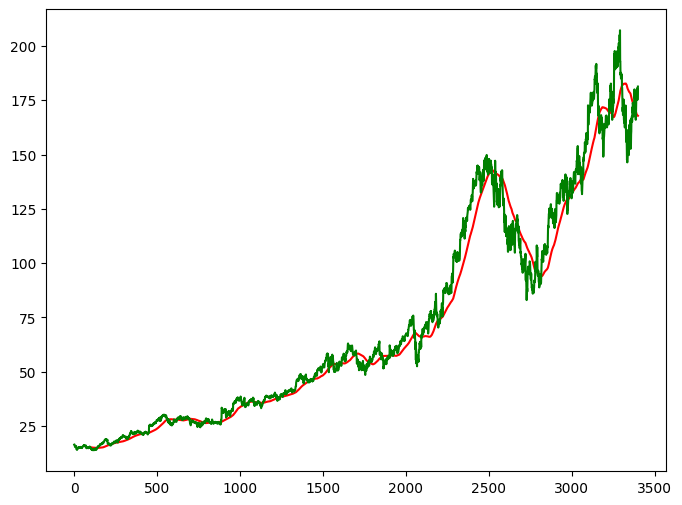

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [ ]:
data.dropna(inplace=True)

In [ ]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [ ]:
data_train.shape

(2720, 1)

In [ ]:
data_test.shape

(680, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_train_scale = scaler.fit_transform(data_train)

In [ ]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])


In [ ]:
x, y = np.array(x), np.array(y)

In [ ]:
from keras.layers import Dense, LSTM, Dropout, Input
from keras.models import Sequential
from keras import metrics


In [ ]:
model = Sequential()


model.add(Input(shape=(x.shape[1], 1)))

model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 3.8633e-04 - loss: 0.0530
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 7.3362e-04 - loss: 0.0048
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 3.3568e-04 - loss: 0.0047
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 6.2142e-04 - loss: 0.0040
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 5.6596e-04 - loss: 0.0042
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 6.5111e-04 - loss: 0.0033
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 4.8502e-04 - loss: 0.0033
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 6.6377e-04 - loss: 0.0032
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 6.8985e-04 - loss: 0.0033
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 3.9524e-04 - loss: 0.0030
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 6.0343e-04 - loss: 0.0031
Epoch 12/50
82/82

In [ ]:
pas_100_days = data_train.tail(100)

In [ ]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [ ]:
data_test.shape

(780, 1)

In [ ]:
data_test_scale = scaler.fit_transform(data_test)

In [ ]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [ ]:
print(x.shape)
print(y.shape)

(680, 100, 1)
(680,)


In [ ]:
y_pred = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step


In [ ]:
scale =1/scaler.scale_

In [ ]:
y_predict = y_pred*scale

In [ ]:
y = y*scale

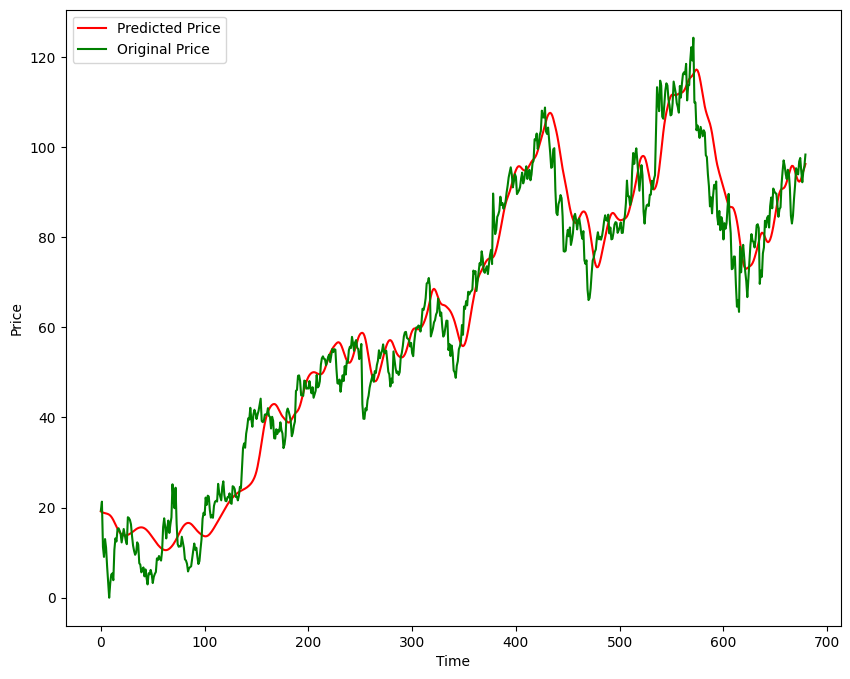

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model.save("Stock_Predictions_Model2.keras")


In [ ]:
model.save("Stock_Predictions_Model2.h5")


In [ ]:
from keras.models import save_model
save_model(model, "Stock_Predictions_Model3.keras", save_format="keras_v3")
